Author : Nicolas Rousset  
Github : https://github.com/Aenori  
Mail : nrousset@gmail.com  
License : MIT  

# Life expenctancy, carbon emission and GNI

Data source : world bank

Here we are going to use world bank data to answer some questions :

- how are CO2 emission and GNI linked ?
- how are GNI and CO2 emission ?
- which countries in this term ?

Data set are directly extracted from the world bank site, with just a few top lines removed (the one that describes the origin of the dataset)

## Step 1 : loading the data

Python allow you to directly load data from an url address. We give a list of filenames, and ask python to load the four data sets into four pandas dataframes.

In [1]:
import pandas as pd

data_set_names = ['mondialbank_CO2_data.csv', 'mondialbank_GNI_data.csv', 
                  'mondialbank_life_expectancy.csv', 'mondialbank_population_data.csv']

url_prefix = 'https://raw.githubusercontent.com/Aenori/20221024_public/main/dataset/'

def read_world_bank_file(file_name):
    return pd.read_csv(url_prefix + file_name, index_col=0)

# map is a function that mean to apply the function given in argument (read_world_bank_file) 
# to all elements of the lits 
df_co2, df_gni, df_life, df_population = map(read_world_bank_file, data_set_names)

Previous cell is an equivalent of :

In [ ]:
import pandas as pd

df_co2 = pd.read_csv('https://raw.githubusercontent.com/Aenori/20221024_public/main/dataset/mondialbank_CO2_data.csv', 
                     index_col=0)
df_gni = pd.read_csv('https://raw.githubusercontent.com/Aenori/20221024_public/main/dataset/mondialbank_GNI_data.csv', 
                     index_col=0)
df_life = pd.read_csv('https://raw.githubusercontent.com/Aenori/20221024_public/main/dataset/mondialbank_life_expectancy.csv', 
                     index_col=0)
df_population = pd.read_csv('https://raw.githubusercontent.com/Aenori/20221024_public/main/dataset/mondialbank_population_data.csv', 
                     index_col=0)

### Step 1.1 : first quick overview of the data

Pandas provide several easy functions to have a quick overview of the data :

**Showing the columns**

In [2]:
df_co2.columns

Index(['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

**Listing the differents values in a column**

In [3]:
df_co2['Indicator Name'].value_counts()

CO2 emissions (metric tons per capita)    266
Name: Indicator Name, dtype: int64

Indicator name is always the same, that is a good news !

**Having a quick overview of the pandas dataset values**

In [4]:
df_co2.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.375662,4.286836,4.198346,4.152282,4.155511,4.161985,4.138992,4.089567,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.953363,4.889850,4.774560,4.686689,4.640333,4.578774,4.480231,4.439935,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.040017,0.026979,0.029121,0.039370,0.030715,0.035013,0.037113,0.036986,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.784804,0.750497,0.802000,0.799460,0.784215,0.803291,0.819434,0.819559,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.869867,2.672439,2.758047,2.731323,2.756557,2.696077,2.913849,2.954129,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.330283,6.217697,6.007777,5.902288,5.839915,6.077849,6.024132,5.961174,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.188222,32.598940,33.205895,33.043510,32.745888,32.127990,31.067533,32.474469,NaN,NaN


At the quick look, we can see we have a lot of NaN values (NaN = not a number), which is logical since we didn't have carbon accounting in the sixties

**Having a look at CO2 histogram**

<AxesSubplot:>

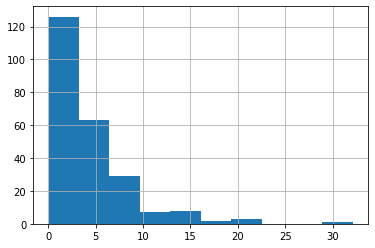

In [5]:
df_co2['2017'].hist()

**Looking for the biggest C02 emitter**

In [6]:
df_co2[df_co2['2017'] > 30]

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Qatar,QAT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.188222,32.59894,33.205895,33.04351,32.745888,32.12799,31.067533,32.474469,NaN,NaN


<a id="step_2_graphical_view"></a>
## Step 2 : Graphical view, looking for the best year of interest

Now we are going to use the main python data visualisation tools

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 6]

Creating an array with the years in string, to select them from the DataFrame

In [8]:
years_column = [str(i) for i in range(1960, 2022)]

Next two cells 

In [9]:
def get_valid_values_count(df):
    """df.count() return, for each column, the number of valid entry"""
    return df.count()[years_column]

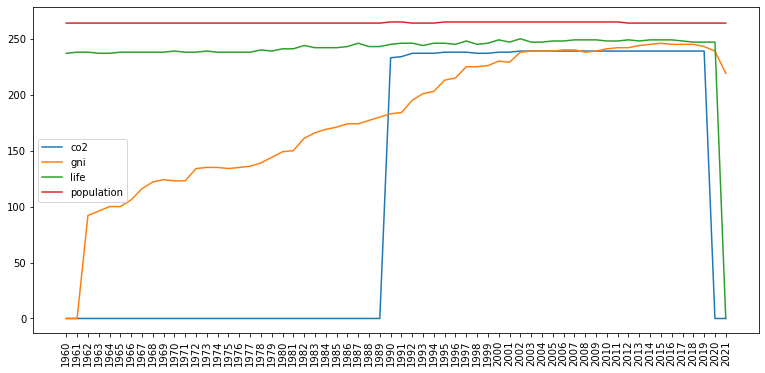

In [10]:
fig, ax = plt.subplots()

ax.plot(years_column, get_valid_values_count(df_co2), label = "co2")
ax.plot(years_column, get_valid_values_count(df_gni), label = "gni")
ax.plot(years_column, get_valid_values_count(df_life), label = "life")
ax.plot(years_column, get_valid_values_count(df_population), label = "population")
ax.legend()
plt.xticks(rotation=90)
plt.show()

In [11]:
get_valid_values_count(df_co2).max()

239

In [12]:
get_valid_values_count(df_co2)['2019']

239

So starting with year 2019 seems a good idea ! What are the country for which we don't have data ?

In [13]:
# We are using the index because its store the country name (simply because it was the first column of the file)
df_co2.index[df_co2['2019'].isna()]

Index(['Aruba', 'American Samoa', 'Bermuda', 'Channel Islands', 'Curacao',
       'Cayman Islands', 'Faroe Islands', 'Gibraltar', 'Greenland', 'Guam',
       'Hong Kong SAR, China', 'Isle of Man', 'Not classified',
       'Macao SAR, China', 'St. Martin (French part)', 'Monaco',
       'Northern Mariana Islands', 'New Caledonia', 'Puerto Rico',
       'West Bank and Gaza', 'French Polynesia', 'San Marino',
       'Sint Maarten (Dutch part)', 'Turks and Caicos Islands',
       'British Virgin Islands', 'Virgin Islands (U.S.)', 'Kosovo'],
      dtype='object', name='Country Name')

## Step 3 : Merging the dataset for year 2019 and cleaning

First, let's check that all the pandas contains the same countries, which allow simpler merging (using the concat function instead of the merge one, which work two framework at the time).

In [14]:
print((df_co2.index == df_gni.index).all())
print((df_co2.index == df_life.index).all())
print((df_co2.index == df_population.index).all())

True
True
True


So now let's join the dataframe :

In [15]:
# We specify left_index and right_index everywhere to specify where are merging on matching index
# Suffixes are used to rename the columns, that are all named 2019
df_2019 = (df_co2[['2019']].merge(df_gni[['2019']], suffixes=('_co2', '_gni'), left_index=True, right_index=True)
                           .merge(df_life[['2019']], left_index=True, right_index=True)
                           .merge(df_population[['2019']], suffixes=('_life', '_population'), left_index=True, right_index=True)
          ) 
df_2019.describe()

,2019_co2,2019_gni,2019_life,2019_population
count,239.000000,243.000000,247.000000,2.640000e+02
mean,4.089567,14893.238772,72.663202,3.140425e+08
std,4.439935,20045.503468,7.292482,9.788967e+08
min,0.036986,240.000000,53.283000,1.076400e+04
25%,0.819559,2060.000000,67.663500,1.751950e+06
50%,2.954129,6320.000000,73.777589,1.047907e+07
75%,5.961174,16935.000000,77.776000,6.150589e+07
max,32.474469,117290.000000,85.078049,7.683806e+09


It is strange to have a country with 7.68 billion population, which one is it ?

In [16]:
df_2019[df_2019['2019_population'] == df_2019['2019_population'].max()]

,2019_co2,2019_gni,2019_life,2019_population
Country Name,,,,
World,4.46966,11576.785383,72.763223,7.683806e+09


It make senses, it seems the data set includes some aggrate, and not just individuals countries. So lets get a file that contains in indicator of which are the real countries.

In [17]:
df_true_country = read_world_bank_file("mondialbank_true_country.csv")

Let's select only the real country

In [18]:
df_2019 = df_2019[df_true_country['RealCountry'] == 1]
df_2019.shape

(216, 4)

And now let's just drop the rows with empty values.

In [19]:
df_2019.dropna(inplace=True)

In [20]:
df_2019.shape

(177, 4)

Let's check the total poulation of our dataset :

In [21]:
df_2019['2019_population'].sum()

7645254206.0

Not bad, we are close to the world total population.

In [22]:
df_2019.describe()

,2019_co2,2019_gni,2019_life,2019_population
count,177.000000,177.000000,177.000000,1.770000e+02
mean,4.177667,14002.847153,72.533895,4.319353e+07
std,4.801612,18720.208880,7.482528,1.520475e+08
min,0.036986,240.000000,53.283000,9.711500e+04
25%,0.792137,2030.000000,67.134000,2.664974e+06
50%,2.845730,5800.000000,74.046341,9.746115e+06
75%,5.698416,16680.000000,77.691000,3.194979e+07
max,32.474469,84260.000000,84.356341,1.407745e+09


What are the 5 most populated countries ?

In [23]:
df_2019.sort_values(by=['2019_population']).tail(5)

,2019_co2,2019_gni,2019_life,2019_population
Country Name,,,,
Pakistan,0.879965,1620.0,67.273000,2.165653e+08
Indonesia,2.290397,4050.0,71.716000,2.706256e+08
United States,14.673411,65970.0,78.787805,3.283300e+08
India,1.797620,2100.0,69.656000,1.366418e+09
China,7.605937,10310.0,76.912000,1.407745e+09


## Step 4 : actually doing the study

First, in case, let's just make a backup of our dataset

In [24]:
df_2019.columns

Index(['2019_co2', '2019_gni', '2019_life', '2019_population'], dtype='object')

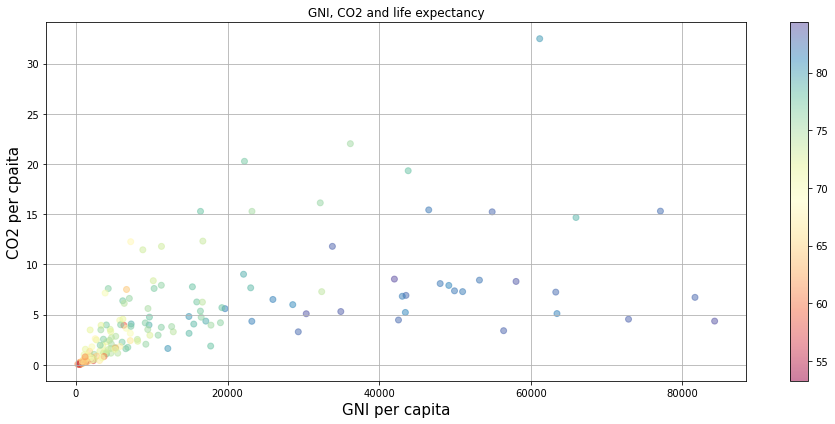

In [25]:
fig, ax = plt.subplots()
xs = df_2019['2019_gni'].values
ys = df_2019['2019_co2'].values
c = df_2019['2019_life'].values
sc = ax.scatter(xs, ys, c=c, alpha=0.5, cmap='Spectral')

ax.set_xlabel('GNI per capita', fontsize=15)
ax.set_ylabel(r'CO2 per cpaita', fontsize=15)
ax.set_title('GNI, CO2 and life expectancy')
fig.colorbar(sc)
ax.grid(True)
fig.tight_layout()

# for x, y, name in zip(xs, ys, df_2019.index):
#     ax.annotate(name, (x,y))

plt.show()

So without surprise CO2 emission, GNI and life expectancy are all strongly correlated.
Lets look at theses correlations

In [26]:
df_2019.corr()

,2019_co2,2019_gni,2019_life,2019_population
2019_co2,1.000000,0.613461,0.520833,0.018366
2019_gni,0.613461,1.000000,0.674441,-0.036352
2019_life,0.520833,0.674441,1.000000,0.010180
2019_population,0.018366,-0.036352,0.010180,1.000000


Let's create a normalized data set, to study the distribution of life expectancy and co2 without the effect of GNI.

In [27]:
df_norm = df_2019.copy(deep=True)

for col in ['2019_co2', '2019_gni', '2019_life']:
    df_norm[col] = (df_norm[col] - df_norm[col].mean()) / df_norm[col].std()
    
df_norm.corr()

,2019_co2,2019_gni,2019_life,2019_population
2019_co2,1.000000,0.613461,0.520833,0.018366
2019_gni,0.613461,1.000000,0.674441,-0.036352
2019_life,0.520833,0.674441,1.000000,0.010180
2019_population,0.018366,-0.036352,0.010180,1.000000


In [28]:
df_norm['co2_without_gni'] = df_norm['2019_co2'] - df_norm.corr()['2019_gni']['2019_co2'] * df_norm['2019_gni']
df_norm['life_without_gni'] = df_norm['2019_life'] - df_norm.corr()['2019_gni']['2019_life'] * df_norm['2019_gni']

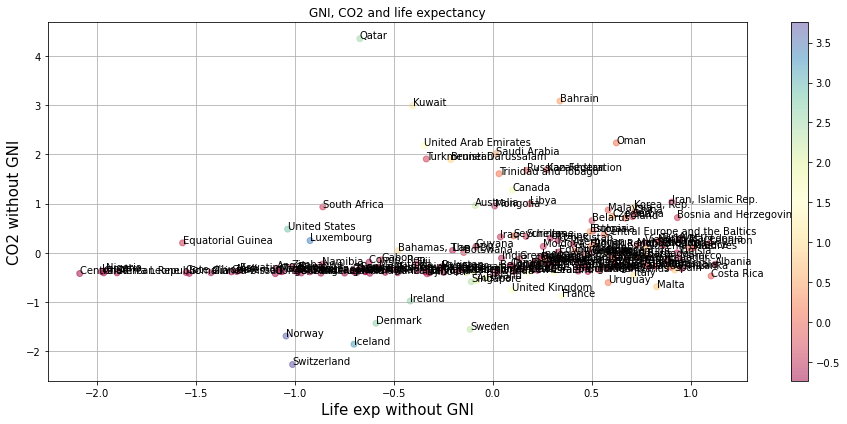

In [29]:
fig, ax = plt.subplots()
xs = df_norm['life_without_gni'].values
ys = df_norm['co2_without_gni'].values
c = df_norm['2019_gni'].values
sc = ax.scatter(xs, ys, c=c, alpha=0.5, cmap='Spectral')

ax.set_xlabel('Life exp without GNI', fontsize=15)
ax.set_ylabel(r'CO2 without GNI', fontsize=15)
ax.set_title('GNI, CO2 and life expectancy')
fig.colorbar(sc)
ax.grid(True)
fig.tight_layout()

for x, y, name in zip(xs, ys, df_2019.index):
    ax.annotate(name, (x,y))

plt.show()

## Bonus : better life expectancy / GNI model using neural networks

In [30]:
df_norm_2 = df_2019.copy(deep=True)

df_norm_2['life'] = (df_norm_2['2019_life'] - df_norm_2['2019_life'].min()) / (
    df_norm_2['2019_life'].max() - df_norm_2['2019_life'].min())
df_norm_2['gni'] = (df_norm_2['2019_gni'] - df_norm_2['2019_gni'].min()) / (
    df_norm_2['2019_gni'].max() - df_norm_2['2019_gni'].min())

In [31]:
import tensorflow as tf

x = df_norm_2['gni'].values.reshape(-1,1)
y = df_norm_2['life'].values

model_linear = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1),
])
model_linear.compile(optimizer=tf.keras.optimizers.SGD(0.1), loss='mse')
history = model_linear.fit(x, y, epochs = 500, verbose = 0)



2022-10-23 08:49:29.475088: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-23 08:49:29.916225: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-23 08:49:29.916251: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-23 08:49:29.969518: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-23 08:49:30.947913: W tensorflow/stream_executor/platform/de

Epoch 1/500


2022-10-23 08:49:32.185671: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-23 08:49:32.186069: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-23 08:49:32.186107: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nicolas-Lenovo-YOGA-730-13IKB): /proc/driver/nvidia/version does not exist
2022-10-23 08:49:32.187063: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


6/6 - 0s - loss: 0.1195 - 351ms/epoch - 58ms/step
Epoch 2/500
6/6 - 0s - loss: 0.0323 - 7ms/epoch - 1ms/step
Epoch 3/500
6/6 - 0s - loss: 0.0306 - 9ms/epoch - 1ms/step
Epoch 4/500
6/6 - 0s - loss: 0.0298 - 8ms/epoch - 1ms/step
Epoch 5/500
6/6 - 0s - loss: 0.0305 - 7ms/epoch - 1ms/step
Epoch 6/500
6/6 - 0s - loss: 0.0291 - 10ms/epoch - 2ms/step
Epoch 7/500
6/6 - 0s - loss: 0.0287 - 12ms/epoch - 2ms/step
Epoch 8/500
6/6 - 0s - loss: 0.0289 - 12ms/epoch - 2ms/step
Epoch 9/500
6/6 - 0s - loss: 0.0291 - 8ms/epoch - 1ms/step
Epoch 10/500
6/6 - 0s - loss: 0.0286 - 11ms/epoch - 2ms/step
Epoch 11/500
6/6 - 0s - loss: 0.0277 - 11ms/epoch - 2ms/step
Epoch 12/500
6/6 - 0s - loss: 0.0276 - 10ms/epoch - 2ms/step
Epoch 13/500
6/6 - 0s - loss: 0.0277 - 9ms/epoch - 1ms/step
Epoch 14/500
6/6 - 0s - loss: 0.0281 - 9ms/epoch - 1ms/step
Epoch 15/500
6/6 - 0s - loss: 0.0281 - 10ms/epoch - 2ms/step
Epoch 16/500
6/6 - 0s - loss: 0.0278 - 9ms/epoch - 1ms/step
Epoch 17/500
6/6 - 0s - loss: 0.0273 - 9ms/epoch - 

Epoch 137/500
6/6 - 0s - loss: 0.0227 - 9ms/epoch - 1ms/step
Epoch 138/500
6/6 - 0s - loss: 0.0214 - 9ms/epoch - 2ms/step
Epoch 139/500
6/6 - 0s - loss: 0.0225 - 10ms/epoch - 2ms/step
Epoch 140/500
6/6 - 0s - loss: 0.0219 - 10ms/epoch - 2ms/step
Epoch 141/500
6/6 - 0s - loss: 0.0219 - 9ms/epoch - 1ms/step
Epoch 142/500
6/6 - 0s - loss: 0.0218 - 8ms/epoch - 1ms/step
Epoch 143/500
6/6 - 0s - loss: 0.0215 - 9ms/epoch - 2ms/step
Epoch 144/500
6/6 - 0s - loss: 0.0212 - 7ms/epoch - 1ms/step
Epoch 145/500
6/6 - 0s - loss: 0.0215 - 9ms/epoch - 1ms/step
Epoch 146/500
6/6 - 0s - loss: 0.0225 - 9ms/epoch - 2ms/step
Epoch 147/500
6/6 - 0s - loss: 0.0215 - 8ms/epoch - 1ms/step
Epoch 148/500
6/6 - 0s - loss: 0.0221 - 9ms/epoch - 2ms/step
Epoch 149/500
6/6 - 0s - loss: 0.0217 - 9ms/epoch - 2ms/step
Epoch 150/500
6/6 - 0s - loss: 0.0215 - 8ms/epoch - 1ms/step
Epoch 151/500
6/6 - 0s - loss: 0.0218 - 10ms/epoch - 2ms/step
Epoch 152/500
6/6 - 0s - loss: 0.0257 - 8ms/epoch - 1ms/step
Epoch 153/500
6/6 - 0

6/6 - 0s - loss: 0.0197 - 9ms/epoch - 1ms/step
Epoch 272/500
6/6 - 0s - loss: 0.0201 - 10ms/epoch - 2ms/step
Epoch 273/500
6/6 - 0s - loss: 0.0195 - 9ms/epoch - 1ms/step
Epoch 274/500
6/6 - 0s - loss: 0.0207 - 9ms/epoch - 1ms/step
Epoch 275/500
6/6 - 0s - loss: 0.0191 - 10ms/epoch - 2ms/step
Epoch 276/500
6/6 - 0s - loss: 0.0203 - 8ms/epoch - 1ms/step
Epoch 277/500
6/6 - 0s - loss: 0.0193 - 8ms/epoch - 1ms/step
Epoch 278/500
6/6 - 0s - loss: 0.0200 - 8ms/epoch - 1ms/step
Epoch 279/500
6/6 - 0s - loss: 0.0194 - 7ms/epoch - 1ms/step
Epoch 280/500
6/6 - 0s - loss: 0.0201 - 10ms/epoch - 2ms/step
Epoch 281/500
6/6 - 0s - loss: 0.0201 - 7ms/epoch - 1ms/step
Epoch 282/500
6/6 - 0s - loss: 0.0191 - 9ms/epoch - 1ms/step
Epoch 283/500
6/6 - 0s - loss: 0.0190 - 8ms/epoch - 1ms/step
Epoch 284/500
6/6 - 0s - loss: 0.0193 - 9ms/epoch - 1ms/step
Epoch 285/500
6/6 - 0s - loss: 0.0194 - 9ms/epoch - 1ms/step
Epoch 286/500
6/6 - 0s - loss: 0.0198 - 7ms/epoch - 1ms/step
Epoch 287/500
6/6 - 0s - loss: 0.02

Epoch 406/500
6/6 - 0s - loss: 0.0184 - 8ms/epoch - 1ms/step
Epoch 407/500
6/6 - 0s - loss: 0.0189 - 8ms/epoch - 1ms/step
Epoch 408/500
6/6 - 0s - loss: 0.0187 - 8ms/epoch - 1ms/step
Epoch 409/500
6/6 - 0s - loss: 0.0193 - 8ms/epoch - 1ms/step
Epoch 410/500
6/6 - 0s - loss: 0.0178 - 9ms/epoch - 2ms/step
Epoch 411/500
6/6 - 0s - loss: 0.0181 - 8ms/epoch - 1ms/step
Epoch 412/500
6/6 - 0s - loss: 0.0187 - 8ms/epoch - 1ms/step
Epoch 413/500
6/6 - 0s - loss: 0.0177 - 9ms/epoch - 2ms/step
Epoch 414/500
6/6 - 0s - loss: 0.0185 - 8ms/epoch - 1ms/step
Epoch 415/500
6/6 - 0s - loss: 0.0188 - 10ms/epoch - 2ms/step
Epoch 416/500
6/6 - 0s - loss: 0.0184 - 7ms/epoch - 1ms/step
Epoch 417/500
6/6 - 0s - loss: 0.0188 - 9ms/epoch - 2ms/step
Epoch 418/500
6/6 - 0s - loss: 0.0185 - 8ms/epoch - 1ms/step
Epoch 419/500
6/6 - 0s - loss: 0.0189 - 8ms/epoch - 1ms/step
Epoch 420/500
6/6 - 0s - loss: 0.0198 - 10ms/epoch - 2ms/step
Epoch 421/500
6/6 - 0s - loss: 0.0185 - 8ms/epoch - 1ms/step
Epoch 422/500
6/6 - 0s

6/6 [==============================] - 0s 1ms/step


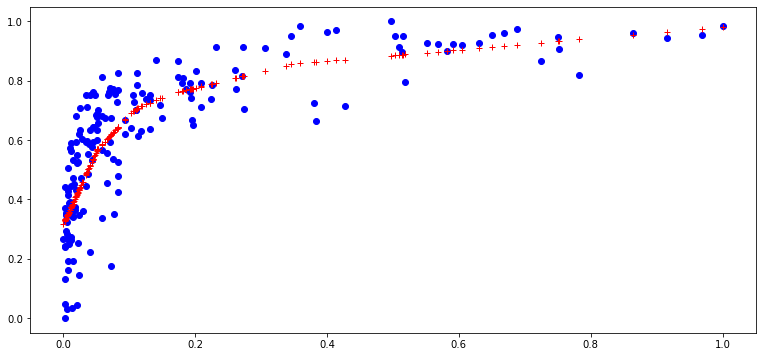

In [32]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'bo')
plt.plot(x, model_linear.predict(x), 'r+')


In [37]:
df_norm_2.index.name = 'CountryName'

In [41]:
df_norm_2.rename(
    columns={'2019_co2' : 'co2', '2019_gni' : 'gni', '2019_life' : 'life', '2019_population' : 'population'},
    inplace=True
)

In [44]:
print(df_norm_2.to_xml(pretty_print=True))

<?xml version='1.0' encoding='utf-8'?>
<data>
  <row>
    <CountryName>Afghanistan</CountryName>
    <co2>0.159824372036919</co2>
    <gni>0.0033325398714591763</gni>
    <life>0.37170125438871254</life>
    <population>38041757.0</population>
  </row>
  <row>
    <CountryName>Angola</CountryName>
    <co2>0.792137069457626</co2>
    <gni>0.02178052844560819</gni>
    <life>0.25307867225219355</life>
    <population>31825299.0</population>
  </row>
  <row>
    <CountryName>Albania</CountryName>
    <co2>1.69224831964856</co2>
    <gni>0.05939062128064747</gni>
    <life>0.8138809284407393</life>
    <population>2854191.0</population>
  </row>
  <row>
    <CountryName>United Arab Emirates</CountryName>
    <co2>19.3295632814806</co2>
    <gni>0.5188050464175197</gni>
    <life>0.7945395904418115</life>
    <population>9770526.0</population>
  </row>
  <row>
    <CountryName>Argentina</CountryName>
    <co2>3.74065029063396</co2>
    <gni>0.1311592477981433</gni>
    <life>0.752542175984

/tmp/ipykernel_8421/3696954925.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  print(df_norm_2.to_xml(pretty_print=True))
